Machine Learning Final Project

Lorina Sinanaj

Epileptic Seizure Recognition

http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition

Attribute information:
The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for 23.6 seconds. The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.5 seconds.

We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time. So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

The response variable is y in column 179, the Explanatory variables X1, X2, ..., X178

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure. Our motivation for creating this version of the data was to simplify access to the data via the creation of a .csv version of it. Although there are 5 classes most authors have done binary classification, namely class 1 (Epileptic seizure) against the rest.

In [ ]:
# download the dataset from UCI
import urllib.request
urllib.request.urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/00388/data.csv', 'data.csv')

('data.csv', <http.client.HTTPMessage at 0x7fb904f22160>)

In [ ]:
# load the data
import numpy as np
data = np.loadtxt('data.csv',skiprows=1,delimiter=',',usecols=np.arange(1,180))
print('Data shape: ' + str(data.shape))

# get the y values (last column)
data_y = data[:,data.shape[1]-1]
print("y shape: " + str(data_y.shape))
print("First 5 rows of y:")
print(data_y[:5,])

# get the x values:  skip the first column (hashed patient id), omit the last column
data_x= data[:,1:data.shape[1]-2]
print("x shape: " + str(data_x.shape))
print("First 2 rows of x:")
print(data_x[:2,:])

Data shape: (11500, 179)
y shape: (11500,)
First 5 rows of y:
[4. 1. 5. 5. 5.]
x shape: (11500, 176)
First 2 rows of x:
[[  190.   229.   223.   192.   125.    55.    -9.   -33.   -38.   -10.
     35.    64.   113.   152.   164.   127.    50.   -47.  -121.  -138.
   -125.  -101.   -50.    11.    39.    24.    48.    64.    46.    13.
    -19.   -61.   -96.  -130.  -132.  -116.  -115.   -71.   -14.    25.
     19.     6.     9.    21.    13.   -37.   -58.   -33.     5.    47.
     80.   101.    88.    73.    69.    41.   -13.   -31.   -61.   -80.
    -77.   -66.   -43.     5.    87.   129.   121.    88.    12.   -76.
   -150.  -207.  -186.  -165.  -148.  -103.   -33.    40.    94.    75.
      8.   -81.  -155.  -227.  -262.  -233.  -218.  -187.  -126.   -65.
    -12.    27.    61.    49.     9.   -46.  -124.  -210.  -281.  -265.
   -181.   -89.    -4.    53.    53.    38.    43.    31.    34.     9.
     -7.   -34.   -70.   -84.  -101.   -70.   -11.    42.    62.    66.
     74.    64. 

In [ ]:
# now we need to convert y to binary
#  the data set has classes 1-5, but classes 2-5 are considered as not a seizure
#  we aim for binary classification of seizure vs non-seizure, so we convert to 1 and 0 instead

# print before:
print("(before) First 10 rows of y:")
print(data_y[:10,])

# do it to it
data_y = np.where( data_y == 1, 1, 0 )

# validate
print("(after) First 10 rows of y:")
print(data_y[:10,])

(before) First 10 rows of y:
[4. 1. 5. 5. 5. 5. 4. 2. 1. 4.]
(after) First 10 rows of y:
[0 1 0 0 0 0 0 0 1 0]


In [ ]:
# normalize x values:  mean=0 and SD=1
mean = data_x.mean(axis=0)
data_x -= mean
std = data_x.std(axis=0)
data_x /= std

# validate
print("X mean: " + str(data_x.mean(axis=0)))
print("X std dev:" + str(data_x.std(axis=0)))

X mean: [ 7.32264491e-18 -2.80886425e-17  3.76510417e-17  2.48969927e-16
  4.10299813e-19 -1.06533140e-17 -2.16493490e-17 -2.04522389e-17
  1.22196939e-17  5.94210671e-18  2.28199102e-17 -7.60143760e-17
 -1.63572356e-17 -1.97592546e-18 -3.09957374e-17 -1.70153746e-17
 -2.14273044e-17 -1.67460249e-16  5.55545947e-17 -1.00402778e-18
  2.14273044e-17  2.84723935e-17  6.58893230e-19  8.78041601e-18
 -1.45680569e-17 -5.99328105e-19  9.39556404e-18  5.98624411e-17
 -1.34071498e-18  1.51279955e-17 -6.22358445e-18  4.94531952e-18
  9.18106171e-18 -1.76670273e-18 -3.13275975e-18 -3.13191502e-17
  1.20736754e-17 -9.91236079e-18 -3.62029247e-19  5.45940105e-18
 -2.18569124e-17  2.37249833e-17  3.48754841e-18 -2.01505479e-17
  3.74096889e-17  1.31814849e-17  3.39100728e-18  2.15769431e-18
 -2.14707479e-17  7.46987013e-18 -3.29639697e-17 -3.39124863e-17
 -6.94191081e-18  1.12808313e-17  3.91956998e-18 -3.14096575e-17
 -1.27434295e-18  7.68950121e-18  2.00612473e-17  2.07563435e-18
 -5.86632192e-17 

In [ ]:
# Next we want to evaluate the balance between positive (seizure) and negative (non-seizure) exemplars
def evalBinaryLabels( y ):
  neg, pos = np.bincount( y )
  total = neg + pos
  print('\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
      total, pos, 100 * pos / total))
  
print("Classification balance of all labels:")
evalBinaryLabels( data_y )

Classification balance of all labels:

    Total: 11500
    Positive: 2300 (20.00% of total)



In [ ]:
# Next, we need to split the data into a training set, test set, and hold-out validation set
#  reasons here....
#  along with stratification to include an appropriate ratio between seizure vs non-seizure activity
from sklearn.model_selection import train_test_split

# generate train vs hold-out/final test data
data_x_train, data_x_test_final, data_y_train, data_y_test_final = train_test_split( data_x, data_y, test_size=0.1, stratify=data_y, random_state=42)

# now generate train/test split which we use to refine our model
x_train, x_test, y_train, y_test = train_test_split(data_x_train, data_y_train, test_size=0.2, stratify=data_y_train)

# print shapes of our train/test sets
print( "x_train shape:", x_train.shape)
print( "x_test shape:", x_test.shape)

# print balance of the segments
print("\nClassification balance of hold-out/final test data:")
evalBinaryLabels( data_y_test_final )

print("\nClassification balance of training data:")
evalBinaryLabels( y_train )

print("\nClassification balance of test validation data:")
evalBinaryLabels( y_test )


x_train shape: (8280, 176)
x_test shape: (2070, 176)

Classification balance of hold-out/final test data:

    Total: 1150
    Positive: 230 (20.00% of total)


Classification balance of training data:

    Total: 8280
    Positive: 1656 (20.00% of total)


Classification balance of test validation data:

    Total: 2070
    Positive: 414 (20.00% of total)



Here we try some non deep-learning methods to see how well it classifies the data

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  fig = plt.figure()
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      #print("Normalized confusion matrix")
  else:
      #print('Confusion matrix, without normalization')
      pass

  # print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close(fig)

from sklearn.metrics import roc_auc_score, accuracy_score

# support function for training and evaluating a scikit learn model
def evalSklModel( m ):
  m.fit(data_x_train, data_y_train)

  # evaluate these models on the final test set for future comparison
  x_eval = data_x_test_final
  y_eval = data_y_test_final

  # Predict on validation set
  pred = m.predict(x_eval)
  pred_prob = m.predict_proba(x_eval)
 
  # print accuracy
  print( "Accuracy: %.4f" % accuracy_score( y_eval, pred ) )

  # print ROC-AUC
  pred_prob = [p[1] for p in pred_prob]
  print( "ROC-AUC: %.4f" % roc_auc_score( y_eval, pred_prob) )

  confusion_mtx = confusion_matrix( y_eval, pred )
  np.set_printoptions(precision=2)
  plot_confusion_matrix( confusion_mtx, ["Non-seizure", "Seizure"], normalize=True)

  print(classification_report( y_eval, pred))

LOGISTIC REGRESSION:
Accuracy: 0.8148
ROC-AUC: 0.5371


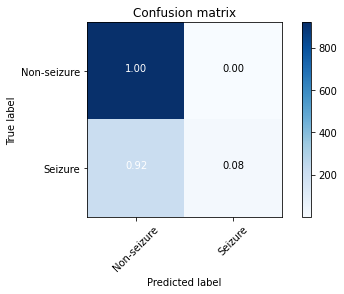

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       920
           1       0.95      0.08      0.14       230

    accuracy                           0.81      1150
   macro avg       0.88      0.54      0.52      1150
weighted avg       0.84      0.81      0.75      1150



In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
print("LOGISTIC REGRESSION:")
evalSklModel( LogisticRegression(max_iter=1000) )

NAIVE BAYES:
Accuracy: 0.9617
ROC-AUC: 0.9862


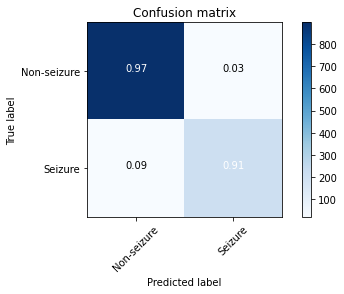

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       920
           1       0.90      0.91      0.90       230

    accuracy                           0.96      1150
   macro avg       0.94      0.94      0.94      1150
weighted avg       0.96      0.96      0.96      1150



In [ ]:
# NAIVE BAYES (NB) model - usually performs well in binary classification tasks
from sklearn.naive_bayes import GaussianNB
print("NAIVE BAYES:")
evalSklModel( GaussianNB() )

In [ ]:
# evaluate the model's accuracy


RANDOM FOREST:
Accuracy: 0.9800
ROC-AUC: 0.9981


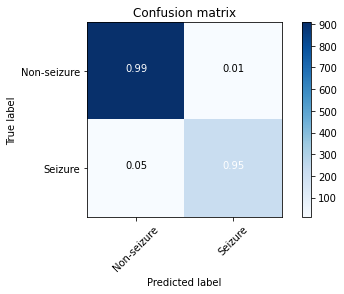

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       920
           1       0.95      0.95      0.95       230

    accuracy                           0.98      1150
   macro avg       0.97      0.97      0.97      1150
weighted avg       0.98      0.98      0.98      1150



In [ ]:
# we have an imbalanced data set, and the random forest works well in these scenarios (need a reference).  Let's see
from sklearn.ensemble import RandomForestClassifier

print ("RANDOM FOREST:")
evalSklModel( RandomForestClassifier() )

In [ ]:
# support functions for our deep learning models

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import StratifiedKFold

METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      #keras.metrics.AUC(name='auc'),
]

# We need a larger than normal batch size to ensure each batch 
#  has a good chance of getting some positive samples
#  default keras batch size is 32
BATCH_SIZE = 64
N_FOLDS = 10
EPOCHS = 100

import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

# create keras seqential model with layers
def createModel( layers, opt=None ):
  model = Sequential()
  for layer in layers:
    model.add(layer)

  model.add( Dense( 1, activation="sigmoid") )

  if opt is None:
    opt = tf.keras.optimizers.RMSprop()

  model.compile(optimizer=opt, loss=tf.keras.losses.binary_crossentropy, metrics=METRICS )
  return model

# function to plot training vs validation metric vs loss
#  params:  m=model, h=history
def plotHistory( m, h ):
  for n, metric in enumerate(m.metrics_names):
    fig = plt.figure(num=n)
    name = metric.replace("_"," ").capitalize()
    plt.plot(h.epoch,  h.history[metric], label='Train')
    plt.plot(h.epoch, h.history['val_'+metric],
             linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])
    plt.title(name)
    plt.legend()
    plt.show()
    plt.close(fig)

# run stratified k fold
def doStratKFold( layers, optimizer, weights, x, y, nfolds=N_FOLDS, epochs=EPOCHS ):
  # https://stats.stackexchange.com/questions/386326/appropriate-way-to-get-cross-validated-auc
  skf = StratifiedKFold(n_splits=nfolds, shuffle=True)

  confusion_mtx = np.zeros((2,2))
  roc_auc = 0.0
  roc_aucs = np.zeros(nfolds)
  yhat = np.empty((0,1))
  yactual = np.empty((0,))
  report = None
  
  for i, (train_index, test_index) in enumerate(skf.split(x, y), 0):

      X_tr = x[train_index]
      X_te = x[test_index]

      y_tr = y[train_index]
      y_te = y[test_index] 

      m = createModel(layers, optimizer )
      hist = m.fit(X_tr, y_tr, epochs=epochs, batch_size=BATCH_SIZE
                   , validation_data=(X_te,y_te), verbose=0, class_weight=weights)

      if i == 0:  # only show history for one run
        plotHistory(m, hist)
    
      # predict on test set
      k_yhat = m.predict(X_te)
      k_yhat = ( k_yhat >= 0.5).astype("int32") # binarize predictions with a sigmoid

      # accumulate predictions/actuals
      yhat = np.append( yhat,k_yhat,axis=0 )
      yactual = np.append( yactual,y_te,axis=0)

      # individual roc-aucs for variance
      roc_aucs[i] = roc_auc_score(y_te, k_yhat)

      """
      # accumulate confusion matrix, roc-auc
      confusion_mtx = confusion_mtx + confusion_matrix( y_te, k_yhat ) / nfolds #avg

      #roc_auc = roc_auc + roc_auc_score(y_te, yhat_bin) / nfolds
      

      df = pd.DataFrame(list(precision_recall_fscore_support(y_te, k_yhat)),
            index=['Precision', 'Recall', 'F1-score', 'Support']).T / nfolds

      if report is None:
        report = df
      else:
        report = report + df
      """

  return ( roc_auc_score(yactual,yhat)
    , np.var(roc_aucs) #variance of the scores
    , confusion_matrix( yactual, yhat )
    , pd.DataFrame(list(precision_recall_fscore_support(yactual, yhat)),
            index=['Precision', 'Recall', 'F1-score', 'Support']).T
  )
  # return roc_auc, confusion_mtx, report

def buildAndEvaluateModel( layers, optimizer=None, weights=None ):
  
  auc, aucvar, cm, rpt = doStratKFold( layers, optimizer, weights, data_x_train, data_y_train )

  np.set_printoptions(precision=3)
  
  plot_confusion_matrix( cm, ["Non-seizure", "Seizure"], normalize=True)

  print( rpt )
  print()
  print( "ROC-AUC: %.4f" % auc )
  print( "ROC-AUC Variance: %.5f" % aucvar )

# evalute model and show graphs compared to the provided x and y data

def evaluateModel( m, hist, x, y ):

  x_preds = m.predict(x)
  x_preds_binary = ( x_preds >= 0.5).astype("int32") #sigmoid

  print( "ROC-AUC: %.4f" % roc_auc_score(y, x_preds) )
  
  #results = m.evaluate(x, y, verbose=0)
  #for name, value in zip(m.metrics_names, results):
  #  print(name, ': ', value)
  
  #_, accuracy = m.evaluate( x, y, verbose=0)
  #print("The model is ~ %.2f" % ( accuracy * 100.0), "% accurate on the test data\n" )

  confusion_mtx = confusion_matrix( y, x_preds_binary )
  np.set_printoptions(precision=2)
  plot_confusion_matrix( confusion_mtx, ["Non-seizure", "Seizure"], normalize=True)

  print(classification_report(y, x_preds_binary))

  if hist is not None:
    plotHistory( m, hist )


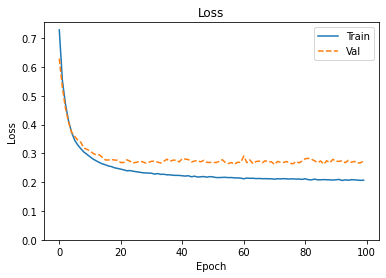

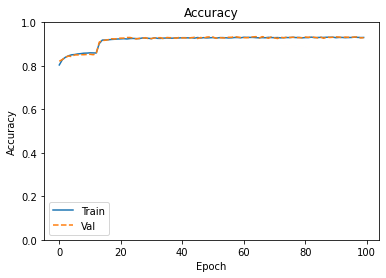

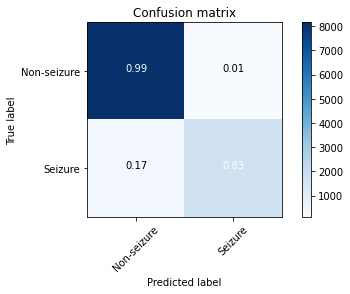

   Precision    Recall  F1-score  Support
0   0.957732  0.985145  0.971245   8280.0
1   0.932897  0.826087  0.876249   2070.0

ROC-AUC: 0.9056
ROC-AUC Variance: 0.000484


In [ ]:
# Attempt 1:  A simple NN with a single layer and 4 neurons
buildAndEvaluateModel( [ 
                      Dense(4, activation="relu", input_shape=(x_train.shape[1],)) 
                      ] )


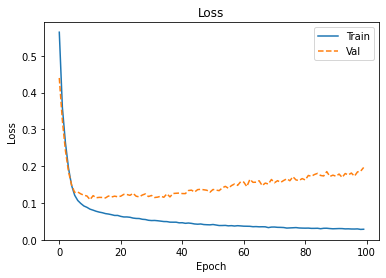

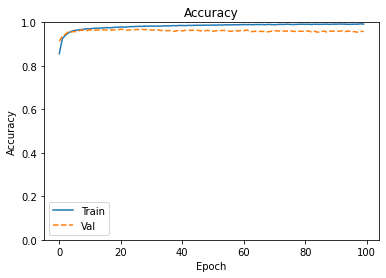

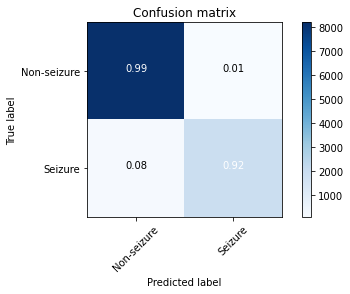

   Precision    Recall  F1-score  Support
0   0.980491  0.989372  0.984911   8280.0
1   0.955890  0.921256  0.938253   2070.0

ROC-AUC: 0.9553
ROC-AUC Variance: 0.000207


In [ ]:
# Attempt 2:  Increase # of neurons in the layer.  
buildAndEvaluateModel( [ 
                      Dense(16, activation="relu", input_shape=(x_train.shape[1],)) 
                      ] )

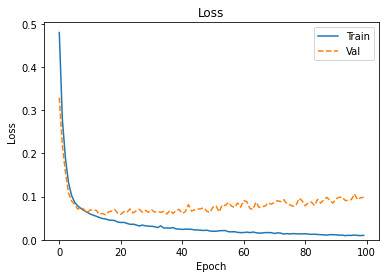

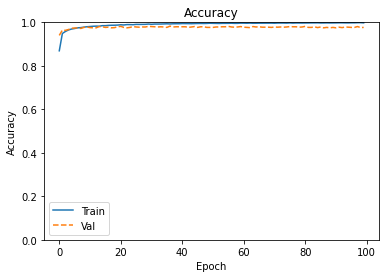

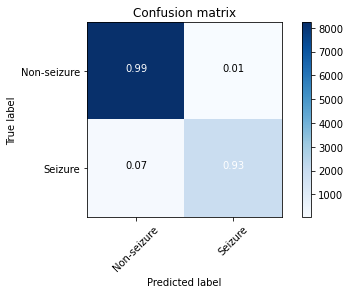

   Precision    Recall  F1-score  Support
0   0.983497  0.993237  0.988343   8280.0
1   0.971831  0.933333  0.952193   2070.0

ROC-AUC: 0.9633
ROC-AUC Variance: 0.000137


In [ ]:

# Attempt 3:  more neurons
buildAndEvaluateModel( [ 
                      Dense( 32, activation="relu", input_shape=(x_train.shape[1],)) 
                      ] )

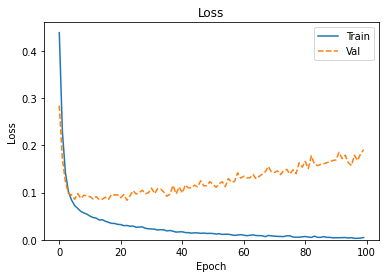

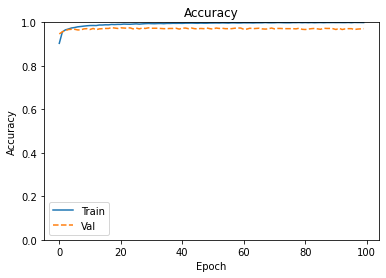

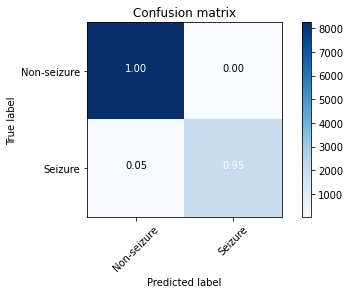

   Precision    Recall  F1-score  Support
0   0.987666  0.996135  0.991883   8280.0
1   0.983992  0.950242  0.966822   2070.0

ROC-AUC: 0.9732
ROC-AUC Variance: 0.000273


In [ ]:
#
buildAndEvaluateModel( [ 
                      Dense(64, activation="relu", input_shape=(x_train.shape[1],)) 
                      ] )

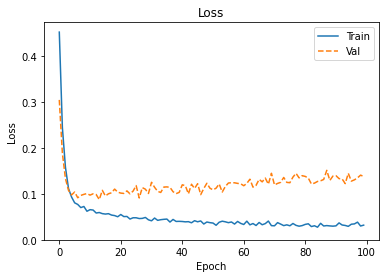

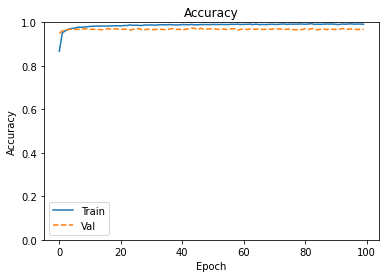

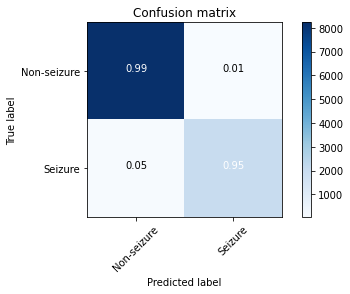

   Precision    Recall  F1-score  Support
0   0.988464  0.993478  0.990965   8280.0
1   0.973373  0.953623  0.963397   2070.0

ROC-AUC: 0.9736
ROC-AUC Variance: 0.00017


In [ ]:
# Add a dropout layers.  Note that this mitigates overfitting.  reasons...
buildAndEvaluateModel( [ 
                      Dense(64, activation="relu", input_shape=(x_train.shape[1],)) 
                      , Dropout(0.1)
                      #, Dense(32, activation="relu" ) 
                      #, Dropout(0.5)
                      ] )

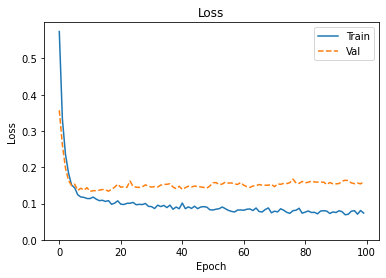

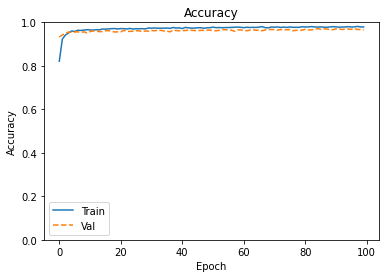

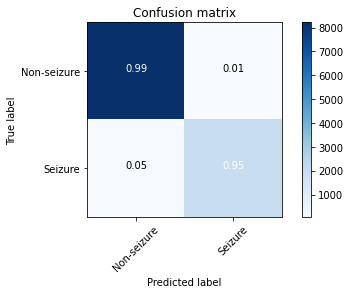

   Precision    Recall  F1-score  Support
0   0.987143  0.992150  0.989640   8280.0
1   0.967949  0.948309  0.958028   2070.0

ROC-AUC: 0.9702
ROC-AUC Variance: 0.00023


In [ ]:
# Increase dropout = same/worse
buildAndEvaluateModel( [ 
                      Dense(64, activation="relu", input_shape=(x_train.shape[1],)) 
                      , Dropout(0.5)
    ])

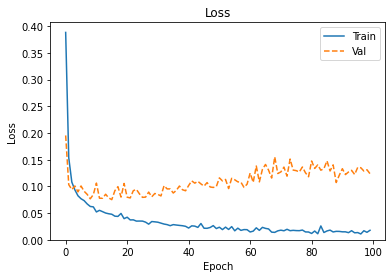

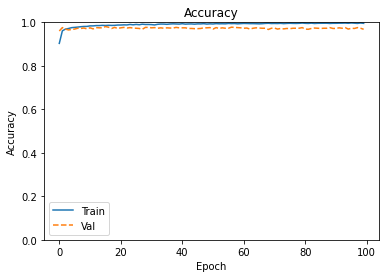

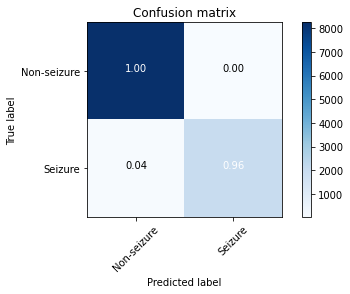

   Precision    Recall  F1-score  Support
0   0.989560  0.995894  0.992717   8280.0
1   0.983143  0.957971  0.970394   2070.0

ROC-AUC: 0.9769
ROC-AUC Variance: 0.000227


In [ ]:
# Add layer + increase neurons = better in this case
buildAndEvaluateModel( [ 
                      Dense(64, activation="relu", input_shape=(x_train.shape[1],)) 
                      , Dropout(0.1)
                      , Dense(64, activation="relu" ) 
                      , Dropout(0.1)
                      ] )

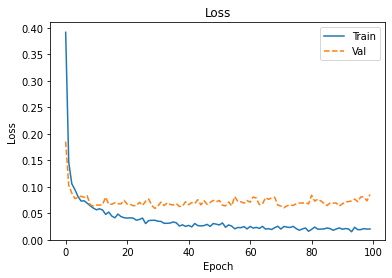

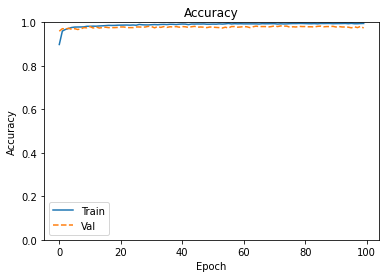

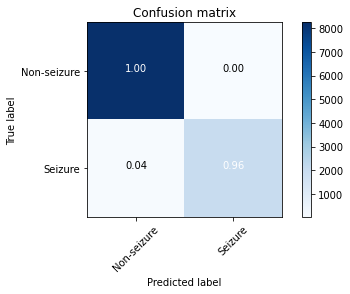

   Precision    Recall  F1-score  Support
0   0.990036  0.996014  0.993016   8280.0
1   0.983663  0.959903  0.971638   2070.0

ROC-AUC: 0.9780
ROC-AUC Variance: 0.000187


In [ ]:
# Increase dropout rate = slight improvement
buildAndEvaluateModel( [ 
                      Dense(64, activation="relu", input_shape=(x_train.shape[1],)) 
                      , Dropout(0.15)
                      , Dense(64, activation="relu" ) 
                      , Dropout(0.15)
                      ] )

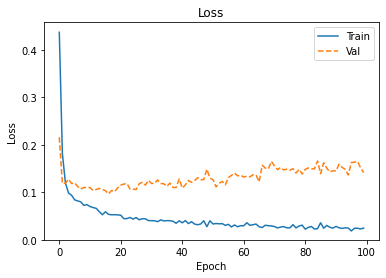

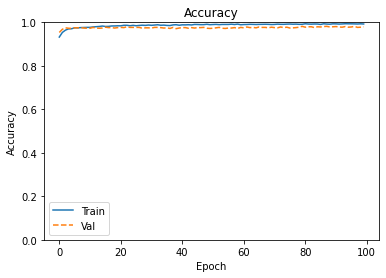

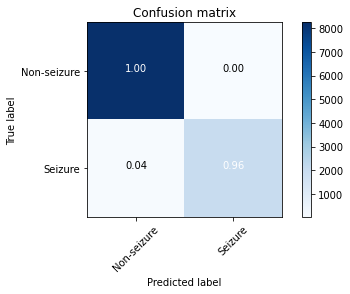

   Precision    Recall  F1-score  Support
0   0.990392  0.995894  0.993135   8280.0
1   0.983202  0.961353  0.972154   2070.0

ROC-AUC: 0.9786
ROC-AUC Variance: 0.00008


In [ ]:
# Increase dropout rate further   = 
# 0.2:  .9782/.0003
# 0.25:  .9776/.0001
# 0.3:  .9772/.00009
# 0.35:  .9713/.00027
buildAndEvaluateModel( [ 
                      Dense(64, activation="relu", input_shape=(x_train.shape[1],)) 
                      , Dropout(0.2)
                      , Dense(64, activation="relu" ) 
                      , Dropout(0.2)
                      ] )

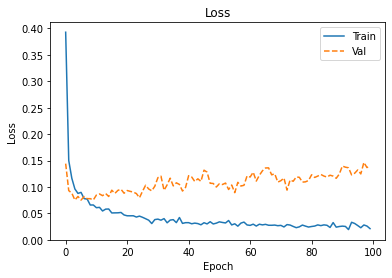

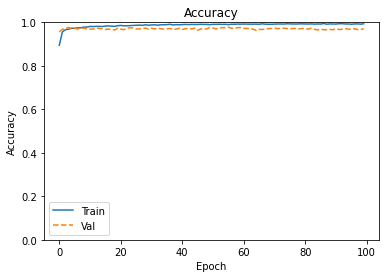

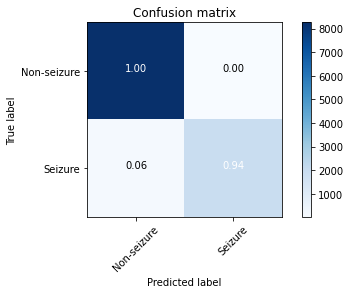

   Precision    Recall  F1-score  Support
0   0.985326  0.997464  0.991358   8280.0
1   0.989329  0.940580  0.964339   2070.0

ROC-AUC: 0.9690
ROC-AUC Variance: 0.00014


In [ ]:
# Add layer = same/worse.  note that the data seems to begin overfitting again
buildAndEvaluateModel( [ 
                      Dense(64, activation="relu", input_shape=(x_train.shape[1],)) 
                      , Dropout(0.2)
                      , Dense(64, activation="relu" ) 
                      , Dropout(0.2)
                      , Dense(64, activation="relu" ) 
                      , Dropout(0.2)
                      ] )

Weight for class 0: 0.62
Weight for class 1: 2.50


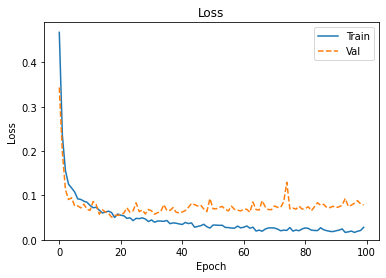

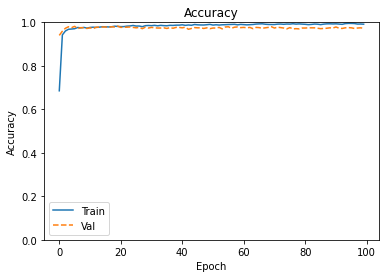

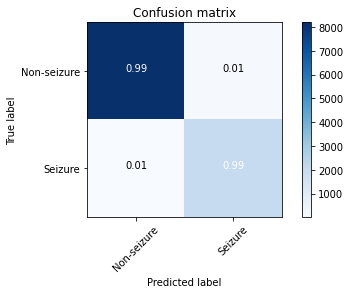

   Precision    Recall  F1-score  Support
0   0.997687  0.989976  0.993817   8280.0
1   0.961106  0.990821  0.975737   2070.0

ROC-AUC: 0.9904
ROC-AUC Variance: 0.00009


In [ ]:
# Now we would like to adjust the weights so that false negatives are penalized more
# Scaling by total/2 helps keep the loss to a similar magnitude.
# change the optimizer to adam
neg, pos = np.bincount( y_train )
total=neg+pos
w0 = (1 / neg)*(total)/2.0 
w1 = (1 / pos)*(total)/2.0
weights = {0: w0, 1: w1}

# print weights
print('Weight for class 0: {:.2f}'.format(w0))
print('Weight for class 1: {:.2f}'.format(w1))

buildAndEvaluateModel( [ 
                      Dense(64, activation="relu", input_shape=(x_train.shape[1],)) 
                      , Dropout(0.2)
                      , Dense(64, activation="relu" ) 
                      , Dropout(0.2)
                      ]
                      , optimizer=keras.optimizers.Adam(lr=1e-3)
                      , weights=weights )


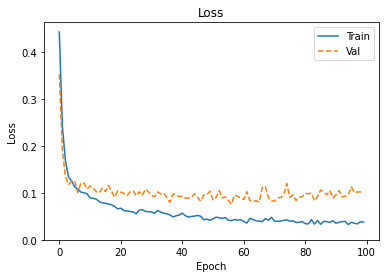

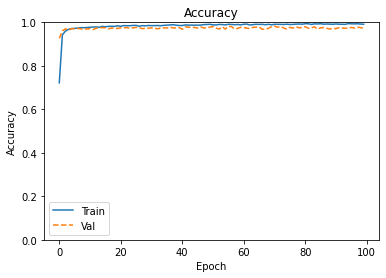

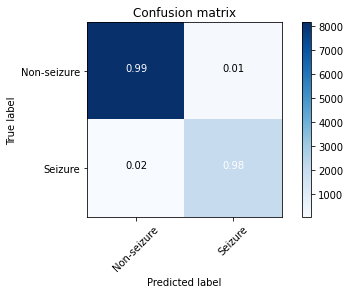

   Precision    Recall  F1-score  Support
0   0.994275  0.985749  0.989993   8280.0
1   0.944886  0.977295  0.960817   2070.0

ROC-AUC: 0.9815
ROC-AUC Variance: 0.00004


In [ ]:

# tried L1:  0.01 (way worse), 0.001-0.0001 (worse on negative class)
# tried L2:  0.01 (worse on negative class), 0.001-0.0001 (worse/no impact)

reg = tf.keras.regularizers.l2(0.0001)
buildAndEvaluateModel( [ 
                      Dense(64, activation="relu", kernel_regularizer=reg, input_shape=(x_train.shape[1],)) 
                      , Dropout(0.2)
                      , Dense(64, activation="relu", kernel_regularizer=reg ) 
                      , Dropout(0.2)
                      ]
                      , optimizer=keras.optimizers.Adam(lr=1e-3)
                      , weights=weights
                      )


Model: "sequential_332"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_406 (Dense)            (None, 64)                11328     
_________________________________________________________________
dropout_66 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_407 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_67 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_408 (Dense)            (None, 1)                 65        
Total params: 15,553
Trainable params: 15,553
Non-trainable params: 0
_________________________________________________________________
ROC-AUC: 0.9980


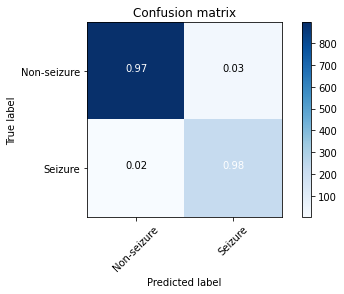

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       920
           1       0.90      0.98      0.94       230

    accuracy                           0.97      1150
   macro avg       0.95      0.98      0.96      1150
weighted avg       0.97      0.97      0.97      1150



In [ ]:
# train one more time on all of the train+test data, then evaluate on the validation data
# At the very end:  use data_x_validate and data_y_validate to perform one final evaluation of our model on unseen data

final_model = createModel( [ 
                      Dense(64, activation="relu", input_shape=(x_train.shape[1],)) 
                      , Dropout(0.2)
                      , Dense(64, activation="relu" ) 
                      , Dropout(0.2)
                      ]
                      , keras.optimizers.Adam(lr=1e-3) )

final_model.summary()

final_model.fit(data_x_train, data_y_train, epochs=EPOCHS, batch_size=BATCH_SIZE
                   , verbose=0, class_weight=weights)

evaluateModel( final_model, None, data_x_test_final, data_y_test_final )
